In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:,.0f}'.format)

i will predict the house prices using the pre built fit and predict functions of linear regression class, then i will try to make a function from scratch which wil predict the house prices.

First i will use a simple dataset

In [54]:
df = pd.read_csv('/content/homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [55]:
# it only has 5 rows, only doing this for revising the learning

In [56]:
x= df.iloc[:,0:1].values
y= df.iloc[:,-1].values

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [58]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [59]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [60]:
y_pred = lr.predict(x_test)

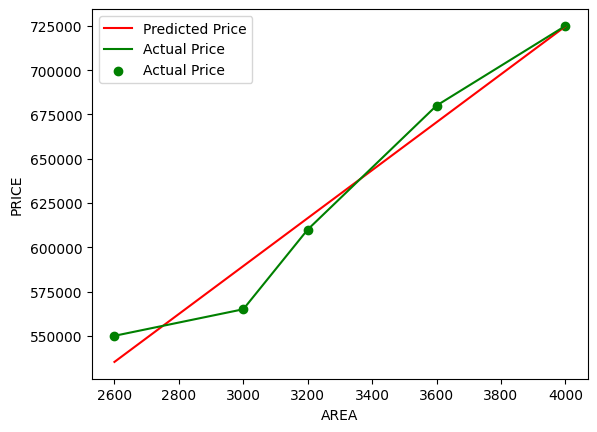

In [61]:
plt.plot(x,lr.predict(x),color='red',label='Predicted Price')
plt.plot(df['area'],df['price'],color='green',label='Actual Price')
plt.scatter(df['area'],df['price'],color='green',label='Actual Price')
plt.xlabel('AREA')
plt.ylabel('PRICE')
plt.legend()

So this model looks accurate. lets see the metrics


In [62]:
print("R2:",r2_score(y_test,y_pred))
print("MAE:",mean_absolute_error(y_test,y_pred))

R2: nan
MAE: 6465.517241379246


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


Since the data was very less, the r2 score is nan. now i will use this model on a bigger dataset

In [63]:
df = pd.read_csv('/content/house_price_regression_dataset.csv')
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,1,0,5,"262,383"
1,4272,3,3,2016,5,1,6,"985,261"
2,3592,1,2,2016,4,0,9,"777,977"
3,966,1,2,1977,3,1,8,"229,699"
4,4926,2,1,1993,5,0,8,"1,041,741"
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2,2,10,"701,494"
996,3179,1,2,1999,3,1,10,"683,723"
997,2606,4,2,1962,4,0,2,"572,024"
998,4723,5,2,1950,2,0,7,"964,865"


In [64]:
df.dtypes
# this is a very clean and good datset, all are numerical columns

,0
Square_Footage,int64
Num_Bedrooms,int64
Num_Bathrooms,int64
Year_Built,int64
Lot_Size,float64
Garage_Size,int64
Neighborhood_Quality,int64
House_Price,float64


In [65]:
x = df.drop('House_Price', axis=1) #all columns except price
y = df['House_Price']

So x is all the inputs and y is the house price column

In [66]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [68]:
y_pred =lr.predict(x_test)

In [69]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("R² Score:", r2)
print("MAE:", mae)

R² Score: 0.9984263636823408
MAE: 8174.583600008702


This  model is very good since my r2 score is almost 1 and mae is around 8000

In [70]:
coefficients=pd.DataFrame({
    'Feature':x.columns,
    'Coefficient':lr.coef_})
print(coefficients)
print("Intercept: ",lr.intercept_)

                Feature  Coefficient
0        Square_Footage          200
1          Num_Bedrooms       10,225
2         Num_Bathrooms        8,208
3            Year_Built          994
4              Lot_Size       14,885
5           Garage_Size        5,146
6  Neighborhood_Quality          115
Intercept:  -2010567.4202702101


so this tells us that, for every sqaure foot, the price increases by 200, and so on, and our value starts with -2010567 when everything else is zero.

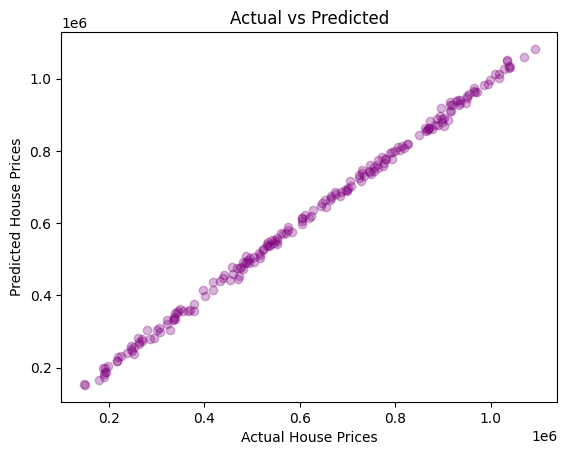

In [71]:
plt.scatter(y_test, y_pred,alpha=0.3, color = 'purple')
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted')
plt.show()

In [72]:
df
# now i will predict a random house price having random features

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,1,0,5,"262,383"
1,4272,3,3,2016,5,1,6,"985,261"
2,3592,1,2,2016,4,0,9,"777,977"
3,966,1,2,1977,3,1,8,"229,699"
4,4926,2,1,1993,5,0,8,"1,041,741"
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2,2,10,"701,494"
996,3179,1,2,1999,3,1,10,"683,723"
997,2606,4,2,1962,4,0,2,"572,024"
998,4723,5,2,1950,2,0,7,"964,865"


In [73]:
# [area, bedrooms, bathrooms, year, floors, condition, grade]
house1 = np.array([[1850,4, 2,2015,1,3,7]])

predicted_price = lr.predict(house1)

print("Predicted Price:", predicted_price)

Predicted Price: [448956.47983508]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Now lets use exact values from the dataset to see if it is accurate enough

In [74]:
house2 = np.array([[3268,4, 2,1983,3,2, 2]])
predicted_price = lr.predict(house2)
print("Predicted Price:", predicted_price)
# i used house # 999 whose price was 742,599. my answer is 724122, which is around 18k less.

Predicted Price: [724122.34938755]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Model Performnace')

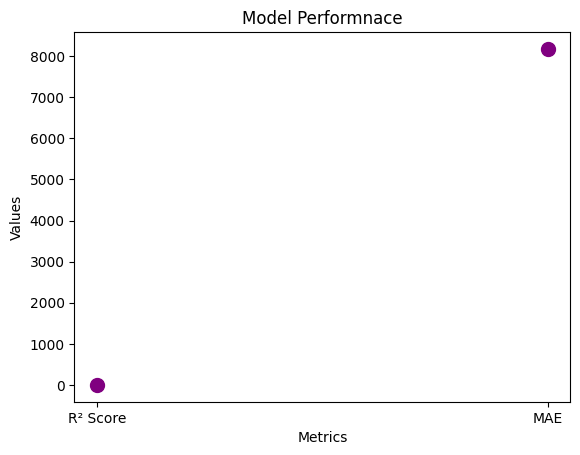

In [76]:
plt.scatter(['R² Score', 'MAE'], [r2, mae], color = 'purple',s=100) # r2 score is almost 1
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Model Performnace')